In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)


In [2]:
# Create dataset dictionary
data = {
    "Company": ["B&Q","B&Q","B&Q","Halfords","Halfords","Halfords"],
    "Year": [2022,2023,2024,2022,2023,2024],
    "Sales (£ million)": [3700,3800,3850,1600,1700,1715],
    "Profit (£ million)": [330,340,335,45,50,49],
    "Customers (millions)": [6.5,6.8,7.0,4.2,4.5,4.8],
    "Online Customers (%)": [68,72,75,55,58,60]
}

df_sales = pd.DataFrame(data)

df_sales


,Company,Year,Sales (£ million),Profit (£ million),Customers (millions),Online Customers (%)
0,B&Q,2022,3700,330,6.5,68
1,B&Q,2023,3800,340,6.8,72
2,B&Q,2024,3850,335,7.0,75
3,Halfords,2022,1600,45,4.2,55
4,Halfords,2023,1700,50,4.5,58
5,Halfords,2024,1715,49,4.8,60


In [3]:
# Save dataset
df_sales.to_csv("bq_halfords_sales_data.csv", index=False)

print("Dataset saved successfully")


Dataset saved successfully


In [4]:
# Load dataset
df = pd.read_csv("bq_halfords_sales_data.csv")

# Show first rows
df.head()


,Company,Year,Sales (£ million),Profit (£ million),Customers (millions),Online Customers (%)
0,B&Q,2022,3700,330,6.5,68
1,B&Q,2023,3800,340,6.8,72
2,B&Q,2024,3850,335,7.0,75
3,Halfords,2022,1600,45,4.2,55
4,Halfords,2023,1700,50,4.5,58


In [5]:
# Calculate profit margin
df["Profit Margin (%)"] = (df["Profit (£ million)"] / df["Sales (£ million)"]) * 100

df


,Company,Year,Sales (£ million),Profit (£ million),Customers (millions),Online Customers (%),Profit Margin (%)
0,B&Q,2022,3700,330,6.5,68,8.918919
1,B&Q,2023,3800,340,6.8,72,8.947368
2,B&Q,2024,3850,335,7.0,75,8.701299
3,Halfords,2022,1600,45,4.2,55,2.812500
4,Halfords,2023,1700,50,4.5,58,2.941176
5,Halfords,2024,1715,49,4.8,60,2.857143


In [6]:
# Dataset info
df.info()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               6 non-null      object 
 1   Year                  6 non-null      int64  
 2   Sales (£ million)     6 non-null      int64  
 3   Profit (£ million)    6 non-null      int64  
 4   Customers (millions)  6 non-null      float64
 5   Online Customers (%)  6 non-null      int64  
 6   Profit Margin (%)     6 non-null      float64
dtypes: float64(2), int64(4), object(1)
memory usage: 468.0+ bytes


,Year,Sales (£ million),Profit (£ million),Customers (millions),Online Customers (%),Profit Margin (%)
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2023.000000,2727.500000,191.500000,5.633333,64.666667,5.863068
std,0.894427,1158.290767,157.237082,1.265965,8.140434,3.279808
min,2022.000000,1600.000000,45.000000,4.200000,55.000000,2.812500
25%,2022.250000,1703.750000,49.250000,4.575000,58.500000,2.878151
50%,2023.000000,2707.500000,190.000000,5.650000,64.000000,5.821238
75%,2023.750000,3775.000000,333.750000,6.725000,71.000000,8.864514
max,2024.000000,3850.000000,340.000000,7.000000,75.000000,8.947368


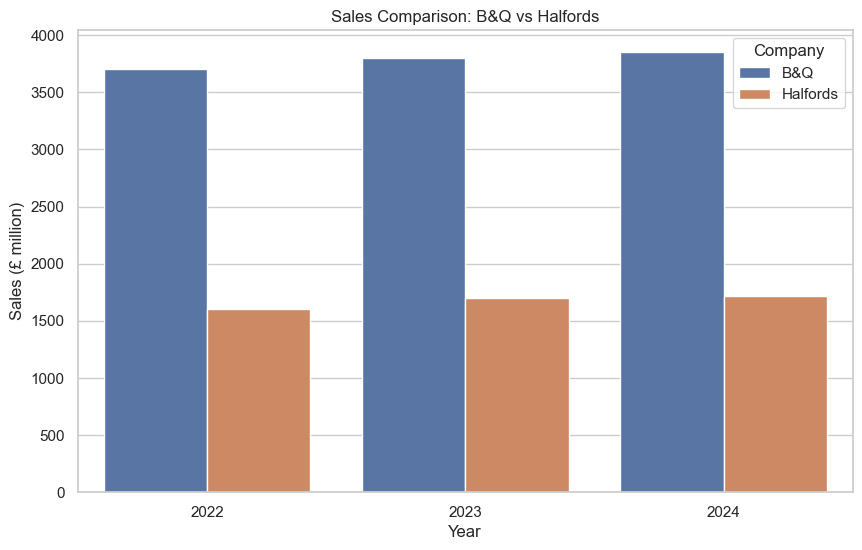

In [7]:
sns.barplot(data=df, x="Year", y="Sales (£ million)", hue="Company")
plt.title("Sales Comparison: B&Q vs Halfords")
plt.show()


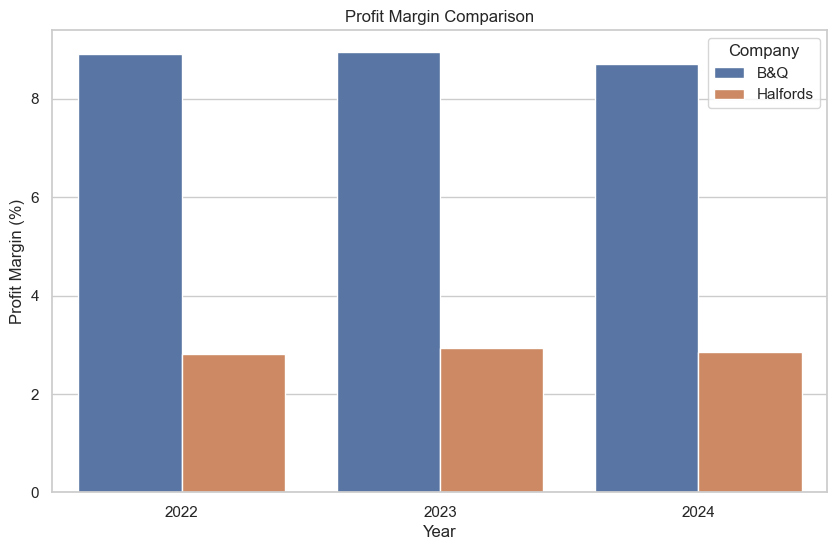

In [8]:
sns.barplot(data=df, x="Year", y="Profit Margin (%)", hue="Company")
plt.title("Profit Margin Comparison")
plt.show()


In [9]:
demographics = {
    "Company": ["B&Q","B&Q","B&Q","Halfords","Halfords","Halfords"],
    "Age Group": ["18-29","30-49","50+","18-29","30-49","50+"],
    "Customer %": [25,45,30,35,40,25],
    "Male %": [55,60,58,70,68,65],
    "Female %": [45,40,42,30,32,35]
}

df_demo = pd.DataFrame(demographics)

df_demo


,Company,Age Group,Customer %,Male %,Female %
0,B&Q,18-29,25,55,45
1,B&Q,30-49,45,60,40
2,B&Q,50+,30,58,42
3,Halfords,18-29,35,70,30
4,Halfords,30-49,40,68,32
5,Halfords,50+,25,65,35


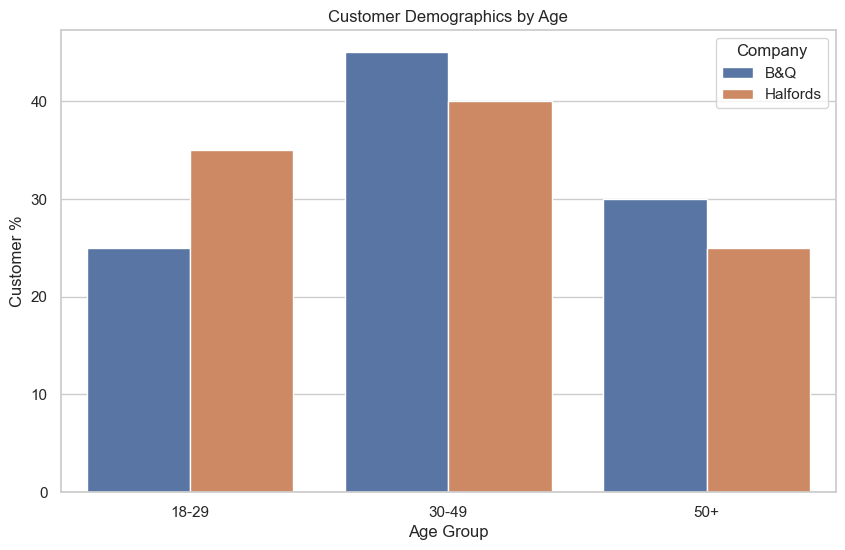

In [10]:
sns.barplot(data=df_demo, x="Age Group", y="Customer %", hue="Company")
plt.title("Customer Demographics by Age")
plt.show()


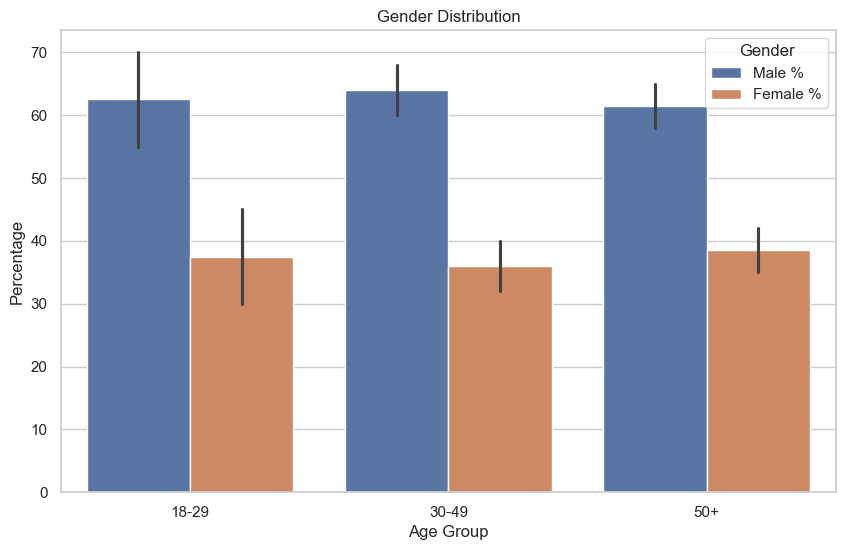

In [11]:
df_demo_melt = df_demo.melt(
    id_vars=["Company","Age Group"],
    value_vars=["Male %","Female %"],
    var_name="Gender",
    value_name="Percentage"
)

sns.barplot(data=df_demo_melt, x="Age Group", y="Percentage", hue="Gender")
plt.title("Gender Distribution")
plt.show()


In [12]:
avg_margin = df.groupby("Company")["Profit Margin (%)"].mean()

print(avg_margin)


Company
B&Q         8.855862
Halfords    2.870273
Name: Profit Margin (%), dtype: float64


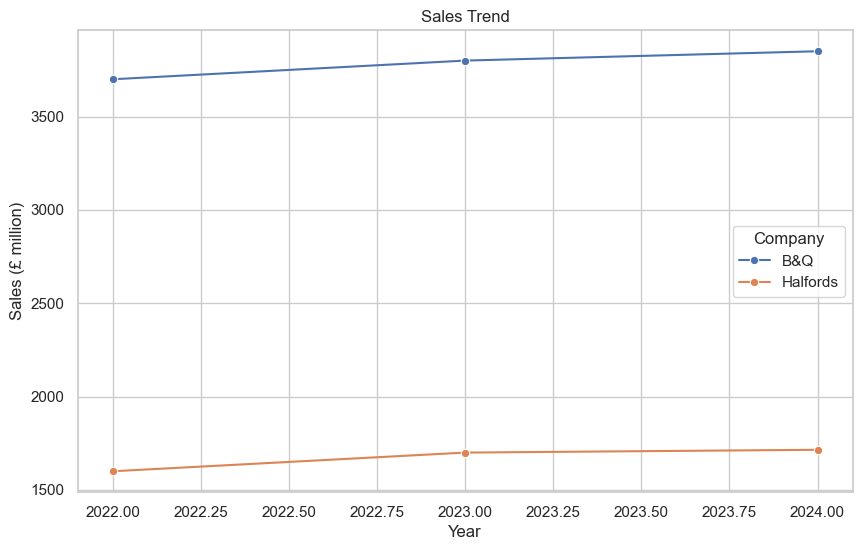

In [13]:
sns.lineplot(data=df, x="Year", y="Sales (£ million)", hue="Company", marker="o")
plt.title("Sales Trend")
plt.show()


In [14]:
combined = pd.merge(df, df_demo, on="Company")

combined.head()


,Company,Year,Sales (£ million),Profit (£ million),Customers (millions),Online Customers (%),Profit Margin (%),Age Group,Customer %,Male %,Female %
0,B&Q,2022,3700,330,6.5,68,8.918919,18-29,25,55,45
1,B&Q,2022,3700,330,6.5,68,8.918919,30-49,45,60,40
2,B&Q,2022,3700,330,6.5,68,8.918919,50+,30,58,42
3,B&Q,2023,3800,340,6.8,72,8.947368,18-29,25,55,45
4,B&Q,2023,3800,340,6.8,72,8.947368,30-49,45,60,40


In [15]:
combined.to_csv("final_bq_halfords_dataset.csv", index=False)

print("Final dataset saved")


Final dataset saved
